In [20]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [21]:
# Load the data
df = pd.read_csv('../top_200.csv')

# Data preprocessing
def clean_numeric_columns(df):
    """Clean and convert numeric columns"""
    # Remove dollar signs and convert market cap and volume
    for col in ['Market Cap', '24h Volume']:
        df[col] = df[col].replace('no data', np.nan)
        df[col] = df[col].str.replace('$', '').str.replace(',', '')
        # Convert M, B, T to actual numbers
        df[col] = df[col].apply(lambda x: convert_to_number(x) if pd.notna(x) else np.nan)
    
    # Convert percentage columns
    percentage_cols = ['Total Profit (%)', 'Market Change (%)', 'Win Rate (%)', 
                      'Max Drawdown (%)', 'CAGR (%)']
    for col in percentage_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Convert other numeric columns
    numeric_cols = ['Price', 'Absolute Profit ($)', 'Total Trades', 'Wins', 'Losses', 
                   'Draws', 'Sharpe Ratio', 'Sortino Ratio', 'Calmar Ratio', 
                   'Profit Factor', 'Expectancy ($)', 'Final Balance']
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    return df

def convert_to_number(value):
    """Convert strings like '17.83M' to actual numbers"""
    if pd.isna(value) or value == 'no data':
        return np.nan
    
    value = str(value).strip()
    multipliers = {'K': 1e3, 'M': 1e6, 'B': 1e9, 'T': 1e12}
    
    for suffix, multiplier in multipliers.items():
        if value.endswith(suffix):
            return float(value[:-1]) * multiplier
    
    try:
        return float(value)
    except:
        return np.nan

# Clean the data
df = clean_numeric_columns(df)

# Display basic info
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()


Dataset Shape: (184, 22)

Column Names:
['Trading Pair', 'Price', 'Market Cap', '24h Volume', 'Cap Size', 'Total Profit (%)', 'Absolute Profit ($)', 'Market Change (%)', 'Total Trades', 'Wins', 'Losses', 'Draws', 'Win Rate (%)', 'Max Drawdown (%)', 'Sharpe Ratio', 'Sortino Ratio', 'Calmar Ratio', 'Profit Factor', 'Expectancy ($)', 'CAGR (%)', 'Avg Hold Time', 'Final Balance']

First few rows:


,Trading Pair,Price,Market Cap,24h Volume,Cap Size,Total Profit (%),Absolute Profit ($),Market Change (%),Total Trades,Wins,...,Win Rate (%),Max Drawdown (%),Sharpe Ratio,Sortino Ratio,Calmar Ratio,Profit Factor,Expectancy ($),CAGR (%),Avg Hold Time,Final Balance
0,VOXEL/USDT,0.073205,17830000.0,30980000.0,Micro-Cap,152.85,1528.527,-72.87,45,38,...,84.44,3.85,4.295,9.431,423.251,8.326,33.967,562.96,2:32:00,2528.527
1,KAITO/USDT,1.180000,284740000.0,25020000.0,Small-Cap,94.31,943.076,81.18,35,31,...,88.57,1.73,6.769,22.848,805.852,20.236,26.945,555.04,0:57:00,1943.076
2,ACH/USDT,0.020081,99070000.0,26250000.0,Micro-Cap,70.19,701.855,-25.73,26,23,...,88.46,2.43,3.294,5.023,308.227,16.719,26.994,195.72,0:40:00,1701.855
3,MAGIC/USDT,0.210629,66270000.0,23550000.0,Micro-Cap,69.31,693.066,-68.85,27,25,...,92.59,2.83,2.645,6.182,261.263,11.174,25.669,192.61,0:46:00,1693.066
4,FUN/USDT,0.009468,100350000.0,7880000.0,Small-Cap,49.78,497.794,109.96,55,46,...,83.64,41.93,0.636,0.330,12.671,1.534,9.051,127.91,4:26:00,1497.794


In [22]:
# Data quality assessment
print("=== DATA QUALITY ASSESSMENT ===\n")

print("Missing Values by Column:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

print(f"\nTotal Records: {len(df)}")
print(f"Profitable Pairs: {len(df[df['Total Profit (%)'] > 0])}")
print(f"Unprofitable Pairs: {len(df[df['Total Profit (%)'] < 0])}")
print(f"Break-even Pairs: {len(df[df['Total Profit (%)'] == 0])}")

# Basic statistics
print("\n=== BASIC STATISTICS ===")
print(df[['Total Profit (%)', 'Win Rate (%)', 'Sharpe Ratio', 'Max Drawdown (%)']].describe())


=== DATA QUALITY ASSESSMENT ===

Missing Values by Column:
            Missing Count  Missing Percentage
Price                   3            1.630435
Market Cap              3            1.630435
24h Volume              3            1.630435

Total Records: 184
Profitable Pairs: 116
Unprofitable Pairs: 45
Break-even Pairs: 23

=== BASIC STATISTICS ===
       Total Profit (%)  Win Rate (%)  Sharpe Ratio  Max Drawdown (%)
count        184.000000    184.000000    184.000000        184.000000
mean           4.185815     69.387391    -11.901533          6.411685
std           21.366826     34.568602     33.450884         12.604844
min          -62.070000      0.000000   -100.000000          0.000000
25%            0.000000     57.055000     -0.199000          0.000000
50%            2.825000     80.000000      0.152500          0.580000
75%            8.305000    100.000000      0.852250          3.407500
max          152.850000    100.000000     16.063000         68.100000


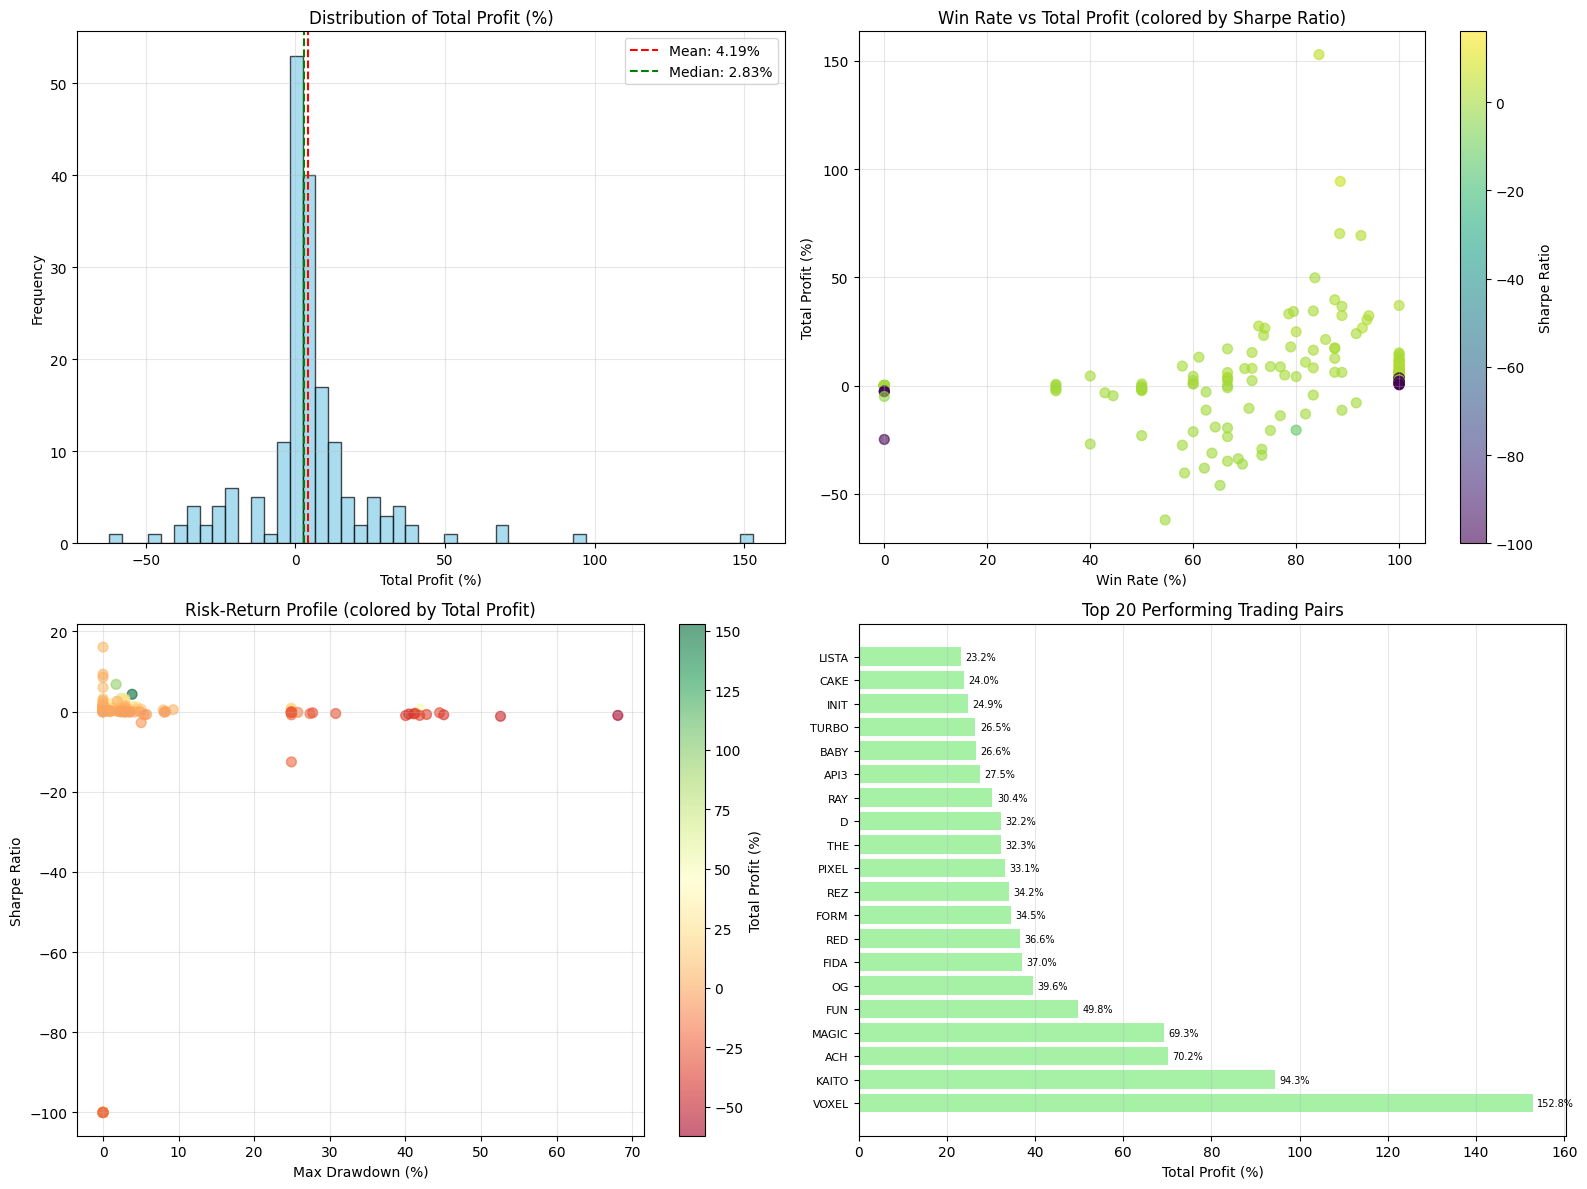

=== PERFORMANCE STATISTICS ===

Best Performer: VOXEL/USDT (152.85%)
Worst Performer: LAYER/USDT (-62.07%)
Average Profit: 4.19%
Median Profit: 2.83%
Standard Deviation: 21.37%


In [23]:
# Performance Overview
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Profit Distribution
axes[0, 0].hist(df['Total Profit (%)'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(df['Total Profit (%)'].mean(), color='red', linestyle='--', 
                   label=f'Mean: {df["Total Profit (%)"].mean():.2f}%')
axes[0, 0].axvline(df['Total Profit (%)'].median(), color='green', linestyle='--', 
                   label=f'Median: {df["Total Profit (%)"].median():.2f}%')
axes[0, 0].set_xlabel('Total Profit (%)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Total Profit (%)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Win Rate vs Total Profit
scatter = axes[0, 1].scatter(df['Win Rate (%)'], df['Total Profit (%)'], 
                            alpha=0.6, c=df['Sharpe Ratio'], cmap='viridis', s=50)
axes[0, 1].set_xlabel('Win Rate (%)')
axes[0, 1].set_ylabel('Total Profit (%)')
axes[0, 1].set_title('Win Rate vs Total Profit (colored by Sharpe Ratio)')
plt.colorbar(scatter, ax=axes[0, 1], label='Sharpe Ratio')
axes[0, 1].grid(True, alpha=0.3)

# 3. Risk-Return Profile (Sharpe Ratio vs Max Drawdown)
valid_data = df.dropna(subset=['Sharpe Ratio', 'Max Drawdown (%)'])
scatter2 = axes[1, 0].scatter(valid_data['Max Drawdown (%)'], valid_data['Sharpe Ratio'], 
                             alpha=0.6, c=valid_data['Total Profit (%)'], cmap='RdYlGn', s=50)
axes[1, 0].set_xlabel('Max Drawdown (%)')
axes[1, 0].set_ylabel('Sharpe Ratio')
axes[1, 0].set_title('Risk-Return Profile (colored by Total Profit)')
plt.colorbar(scatter2, ax=axes[1, 0], label='Total Profit (%)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Top 20 Performers
top_20 = df.nlargest(20, 'Total Profit (%)')
y_pos = np.arange(len(top_20))
bars = axes[1, 1].barh(y_pos, top_20['Total Profit (%)'], color='lightgreen', alpha=0.8)
axes[1, 1].set_yticks(y_pos)
axes[1, 1].set_yticklabels([pair.split('/')[0] for pair in top_20['Trading Pair']], fontsize=8)
axes[1, 1].set_xlabel('Total Profit (%)')
axes[1, 1].set_title('Top 20 Performing Trading Pairs')
axes[1, 1].grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    axes[1, 1].text(width + 1, bar.get_y() + bar.get_height()/2, 
                    f'{width:.1f}%', ha='left', va='center', fontsize=7)

plt.tight_layout()
plt.show()

# Performance Statistics
print("=== PERFORMANCE STATISTICS ===\n")
print(f"Best Performer: {df.loc[df['Total Profit (%)'].idxmax(), 'Trading Pair']} "
      f"({df['Total Profit (%)'].max():.2f}%)")
print(f"Worst Performer: {df.loc[df['Total Profit (%)'].idxmin(), 'Trading Pair']} "
      f"({df['Total Profit (%)'].min():.2f}%)")
print(f"Average Profit: {df['Total Profit (%)'].mean():.2f}%")
print(f"Median Profit: {df['Total Profit (%)'].median():.2f}%")
print(f"Standard Deviation: {df['Total Profit (%)'].std():.2f}%")


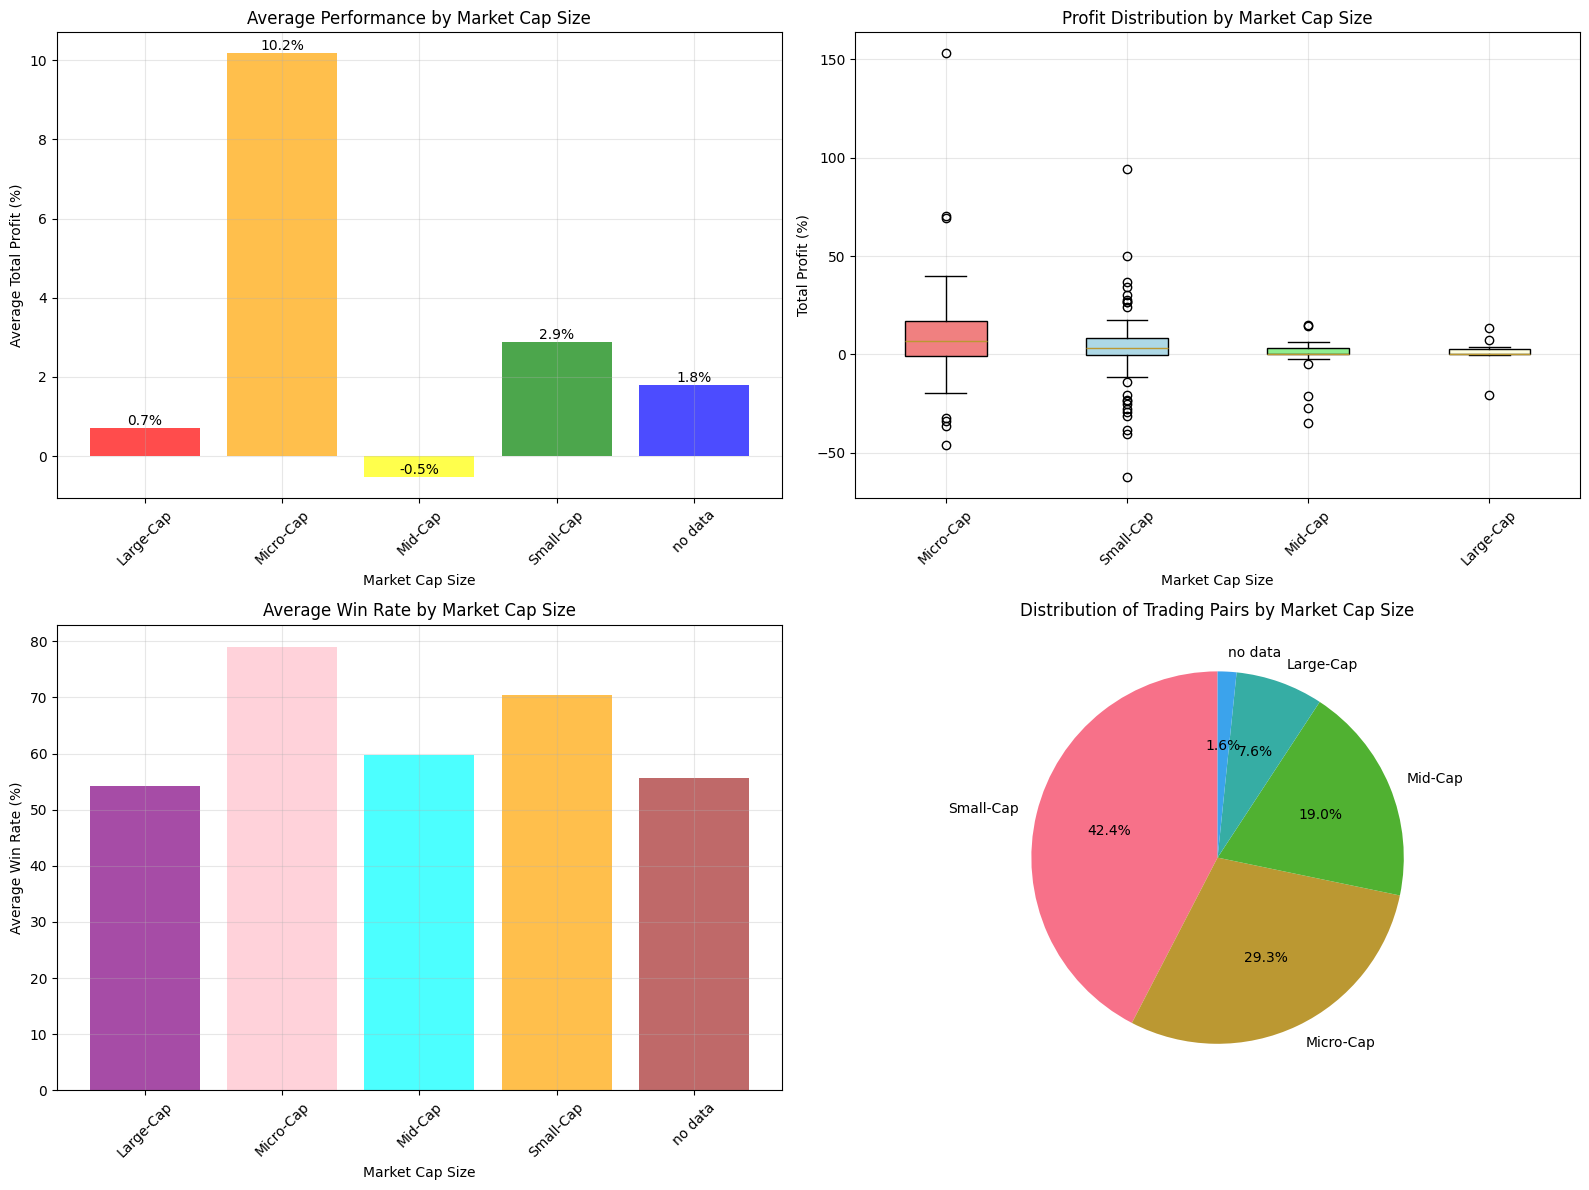

=== MARKET CAP ANALYSIS ===

Performance by Market Cap Size:
           Total Profit (%)_mean  Total Profit (%)_median  \
Cap Size                                                    
Large-Cap                   0.71                     0.12   
Micro-Cap                  10.17                     6.66   
Mid-Cap                    -0.52                     0.42   
Small-Cap                   2.87                     3.26   
no data                     1.80                     0.00   

           Total Profit (%)_std  Total Profit (%)_count  Win Rate (%)_mean  \
Cap Size                                                                     
Large-Cap                  7.30                      14              54.17   
Micro-Cap                 29.38                      54              78.97   
Mid-Cap                    9.48                      35              59.66   
Small-Cap                 20.06                      78              70.38   
no data                    4.03            

In [24]:
# Market Cap Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Performance by Market Cap Size
cap_performance = df.groupby('Cap Size').agg({
    'Total Profit (%)': ['mean', 'median', 'std', 'count'],
    'Win Rate (%)': 'mean',
    'Sharpe Ratio': 'mean'
}).round(2)

cap_performance.columns = ['_'.join(col).strip() for col in cap_performance.columns]
cap_sizes = cap_performance.index

# Bar plot for average profit by cap size
bars1 = axes[0, 0].bar(cap_sizes, cap_performance['Total Profit (%)_mean'], 
                       alpha=0.7, color=['red', 'orange', 'yellow', 'green', 'blue'])
axes[0, 0].set_xlabel('Market Cap Size')
axes[0, 0].set_ylabel('Average Total Profit (%)')
axes[0, 0].set_title('Average Performance by Market Cap Size')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}%', ha='center', va='bottom')

# 2. Box plot of profit distribution by cap size
df_clean = df.dropna(subset=['Cap Size', 'Total Profit (%)'])
cap_order = ['Micro-Cap', 'Small-Cap', 'Mid-Cap', 'Large-Cap']
cap_order = [cap for cap in cap_order if cap in df_clean['Cap Size'].unique()]

df_clean['Cap Size'] = pd.Categorical(df_clean['Cap Size'], categories=cap_order, ordered=True)
df_clean = df_clean.sort_values('Cap Size')

box_data = [df_clean[df_clean['Cap Size'] == cap]['Total Profit (%)'].values for cap in cap_order]
bp = axes[0, 1].boxplot(box_data, labels=cap_order, patch_artist=True)
axes[0, 1].set_xlabel('Market Cap Size')
axes[0, 1].set_ylabel('Total Profit (%)')
axes[0, 1].set_title('Profit Distribution by Market Cap Size')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# Color the boxes
colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightyellow']
for patch, color in zip(bp['boxes'], colors[:len(bp['boxes'])]):
    patch.set_facecolor(color)

# 3. Win Rate by Market Cap Size
axes[1, 0].bar(cap_sizes, cap_performance['Win Rate (%)_mean'], 
               alpha=0.7, color=['purple', 'pink', 'cyan', 'orange', 'brown'])
axes[1, 0].set_xlabel('Market Cap Size')
axes[1, 0].set_ylabel('Average Win Rate (%)')
axes[1, 0].set_title('Average Win Rate by Market Cap Size')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# 4. Count of pairs by cap size
cap_counts = df['Cap Size'].value_counts()
pie = axes[1, 1].pie(cap_counts.values, labels=cap_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Distribution of Trading Pairs by Market Cap Size')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("=== MARKET CAP ANALYSIS ===\n")
print("Performance by Market Cap Size:")
print(cap_performance)

print(f"\nTotal pairs analyzed: {len(df)}")
for cap_size in df['Cap Size'].unique():
    if pd.notna(cap_size):
        subset = df[df['Cap Size'] == cap_size]
        profitable = len(subset[subset['Total Profit (%)'] > 0])
        print(f"{cap_size}: {len(subset)} pairs ({profitable} profitable, {profitable/len(subset)*100:.1f}%)")


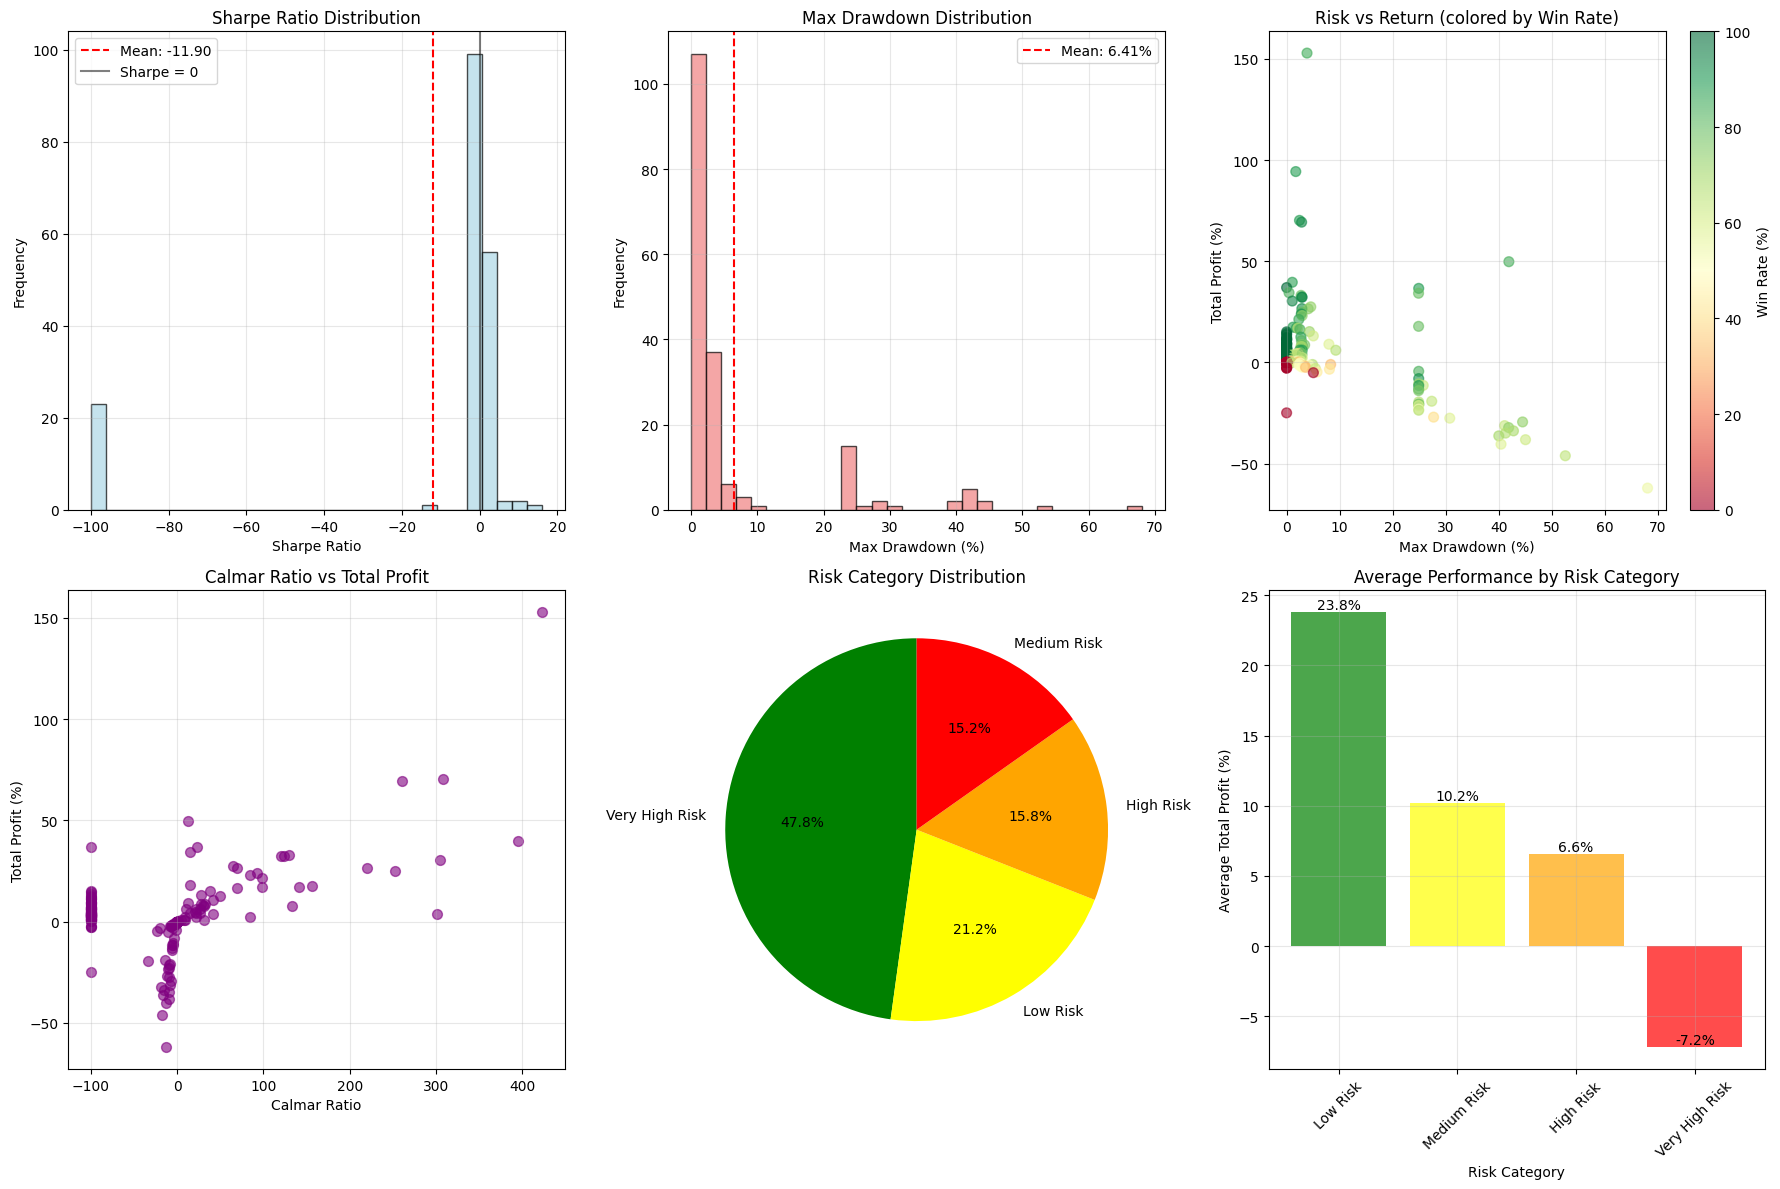

=== RISK ASSESSMENT ===

Risk Metrics Summary:
       Sharpe Ratio  Sortino Ratio  Max Drawdown (%)  Calmar Ratio
count    184.000000     184.000000        184.000000    184.000000
mean     -11.901533     -48.428766          6.411685     -5.143147
std       33.450884      52.676203         12.604844    157.341917
min     -100.000000    -100.000000          0.000000   -526.077000
25%       -0.199000    -100.000000          0.000000   -100.000000
50%        0.152500     -51.388000          0.580000     -7.132500
75%        0.852250       0.000000          3.407500     10.633750
max       16.063000     121.605000         68.100000   1395.286000

Risk Category Distribution:
Very High Risk: 88 pairs (avg profit: -7.20%)
Low Risk: 39 pairs (avg profit: 23.80%)
High Risk: 29 pairs (avg profit: 6.56%)
Medium Risk: 28 pairs (avg profit: 10.20%)

High-Performing Low-Risk Pairs (22 found):
   Trading Pair  Total Profit (%)  Sharpe Ratio  Max Drawdown (%)
0    VOXEL/USDT            152.85         

In [25]:
# Risk Assessment Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Sharpe Ratio Distribution
axes[0, 0].hist(df['Sharpe Ratio'], bins=30, alpha=0.7, color='lightblue', edgecolor='black')
axes[0, 0].axvline(df['Sharpe Ratio'].mean(), color='red', linestyle='--', 
                   label=f'Mean: {df["Sharpe Ratio"].mean():.2f}')
axes[0, 0].axvline(0, color='black', linestyle='-', alpha=0.5, label='Sharpe = 0')
axes[0, 0].set_xlabel('Sharpe Ratio')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Sharpe Ratio Distribution')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Max Drawdown Distribution
axes[0, 1].hist(df['Max Drawdown (%)'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].axvline(df['Max Drawdown (%)'].mean(), color='red', linestyle='--', 
                   label=f'Mean: {df["Max Drawdown (%)"].mean():.2f}%')
axes[0, 1].set_xlabel('Max Drawdown (%)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Max Drawdown Distribution')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Risk-Return Scatter (Profit vs Max Drawdown)
valid_risk = df.dropna(subset=['Total Profit (%)', 'Max Drawdown (%)'])
scatter3 = axes[0, 2].scatter(valid_risk['Max Drawdown (%)'], valid_risk['Total Profit (%)'], 
                             alpha=0.6, c=valid_risk['Win Rate (%)'], cmap='RdYlGn', s=50)
axes[0, 2].set_xlabel('Max Drawdown (%)')
axes[0, 2].set_ylabel('Total Profit (%)')
axes[0, 2].set_title('Risk vs Return (colored by Win Rate)')
plt.colorbar(scatter3, ax=axes[0, 2], label='Win Rate (%)')
axes[0, 2].grid(True, alpha=0.3)

# 4. Calmar Ratio vs Profit
valid_calmar = df.dropna(subset=['Calmar Ratio', 'Total Profit (%)'])
# Filter out extreme outliers for better visualization
calmar_q99 = valid_calmar['Calmar Ratio'].quantile(0.99)
calmar_q01 = valid_calmar['Calmar Ratio'].quantile(0.01)
valid_calmar_filtered = valid_calmar[
    (valid_calmar['Calmar Ratio'] <= calmar_q99) & 
    (valid_calmar['Calmar Ratio'] >= calmar_q01)
]

axes[1, 0].scatter(valid_calmar_filtered['Calmar Ratio'], valid_calmar_filtered['Total Profit (%)'], 
                   alpha=0.6, color='purple', s=50)
axes[1, 0].set_xlabel('Calmar Ratio')
axes[1, 0].set_ylabel('Total Profit (%)')
axes[1, 0].set_title('Calmar Ratio vs Total Profit')
axes[1, 0].grid(True, alpha=0.3)

# 5. Risk Categories
def categorize_risk(row):
    sharpe = row['Sharpe Ratio']
    drawdown = row['Max Drawdown (%)']
    
    if pd.isna(sharpe) or pd.isna(drawdown):
        return 'Unknown'
    
    if sharpe > 1 and drawdown < 5:
        return 'Low Risk'
    elif sharpe > 0.5 and drawdown < 15:
        return 'Medium Risk'
    elif sharpe > 0 and drawdown < 30:
        return 'High Risk'
    else:
        return 'Very High Risk'

df['Risk Category'] = df.apply(categorize_risk, axis=1)
risk_counts = df['Risk Category'].value_counts()

# Pie chart for risk categories
colors_risk = ['green', 'yellow', 'orange', 'red', 'gray']
pie_risk = axes[1, 1].pie(risk_counts.values, labels=risk_counts.index, 
                         autopct='%1.1f%%', startangle=90, colors=colors_risk)
axes[1, 1].set_title('Risk Category Distribution')

# 6. Performance by Risk Category
risk_performance = df.groupby('Risk Category')['Total Profit (%)'].mean().sort_values(ascending=False)
bars_risk = axes[1, 2].bar(risk_performance.index, risk_performance.values, 
                          alpha=0.7, color=['green', 'yellow', 'orange', 'red', 'gray'])
axes[1, 2].set_xlabel('Risk Category')
axes[1, 2].set_ylabel('Average Total Profit (%)')
axes[1, 2].set_title('Average Performance by Risk Category')
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].grid(True, alpha=0.3)

# Add value labels
for bar in bars_risk:
    height = bar.get_height()
    axes[1, 2].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Risk Statistics
print("=== RISK ASSESSMENT ===\n")

print("Risk Metrics Summary:")
risk_metrics = df[['Sharpe Ratio', 'Sortino Ratio', 'Max Drawdown (%)', 'Calmar Ratio']].describe()
print(risk_metrics)

print(f"\nRisk Category Distribution:")
for category, count in risk_counts.items():
    avg_profit = df[df['Risk Category'] == category]['Total Profit (%)'].mean()
    print(f"{category}: {count} pairs (avg profit: {avg_profit:.2f}%)")

# High-performing low-risk pairs
low_risk_high_profit = df[
    (df['Risk Category'] == 'Low Risk') & 
    (df['Total Profit (%)'] > 10)
].sort_values('Total Profit (%)', ascending=False)

print(f"\nHigh-Performing Low-Risk Pairs ({len(low_risk_high_profit)} found):")
if len(low_risk_high_profit) > 0:
    print(low_risk_high_profit[['Trading Pair', 'Total Profit (%)', 'Sharpe Ratio', 'Max Drawdown (%)']].head(10))


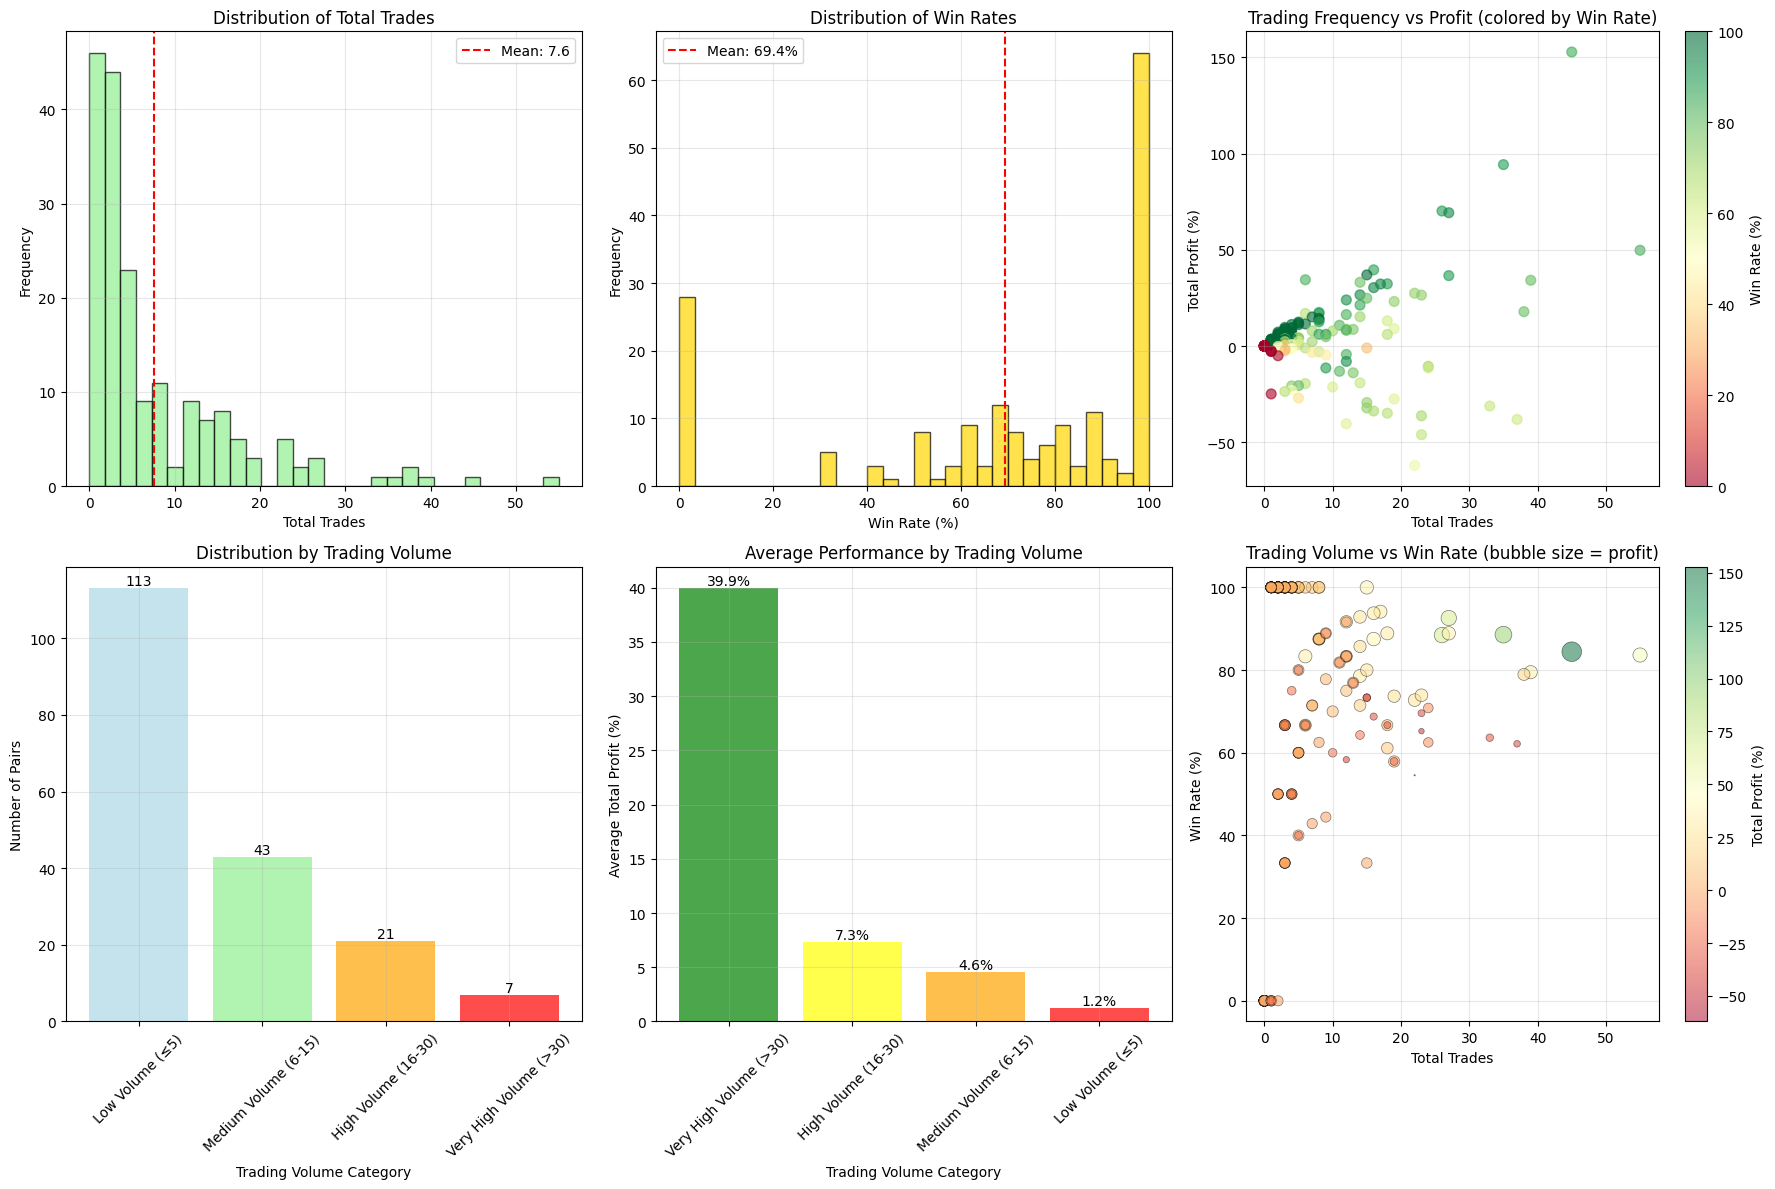

=== TRADING PATTERNS ANALYSIS ===

Trading Volume Statistics:
Average trades per pair: 7.6
Median trades per pair: 4.0
Most active pair: FUN/USDT (55 trades)

Win Rate Statistics:
Average win rate: 69.4%
Median win rate: 80.0%
Pairs with 100% win rate: 64
Pairs with 0% win rate: 28

Performance by Trading Volume:
Very High Volume (>30): 7 pairs, avg profit: 39.94%, avg win rate: 77.3%
High Volume (16-30): 21 pairs, avg profit: 7.30%, avg win rate: 74.1%
Medium Volume (6-15): 43 pairs, avg profit: 4.59%, avg win rate: 77.9%
Low Volume (≤5): 113 pairs, avg profit: 1.24%, avg win rate: 64.8%

High-Frequency High-Performance Pairs (10 found):
    Trading Pair  Total Trades  Total Profit (%)  Win Rate (%)
0     VOXEL/USDT            45            152.85         84.44
1     KAITO/USDT            35             94.31         88.57
2       ACH/USDT            26             70.19         88.46
3     MAGIC/USDT            27             69.31         92.59
4       FUN/USDT            55        

In [26]:
# Trading Patterns Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Total Trades Distribution
axes[0, 0].hist(df['Total Trades'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 0].axvline(df['Total Trades'].mean(), color='red', linestyle='--', 
                   label=f'Mean: {df["Total Trades"].mean():.1f}')
axes[0, 0].set_xlabel('Total Trades')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Total Trades')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Win Rate Distribution
axes[0, 1].hist(df['Win Rate (%)'], bins=30, alpha=0.7, color='gold', edgecolor='black')
axes[0, 1].axvline(df['Win Rate (%)'].mean(), color='red', linestyle='--', 
                   label=f'Mean: {df["Win Rate (%)"].mean():.1f}%')
axes[0, 1].set_xlabel('Win Rate (%)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Win Rates')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Total Trades vs Profit
scatter4 = axes[0, 2].scatter(df['Total Trades'], df['Total Profit (%)'], 
                             alpha=0.6, c=df['Win Rate (%)'], cmap='RdYlGn', s=50)
axes[0, 2].set_xlabel('Total Trades')
axes[0, 2].set_ylabel('Total Profit (%)')
axes[0, 2].set_title('Trading Frequency vs Profit (colored by Win Rate)')
plt.colorbar(scatter4, ax=axes[0, 2], label='Win Rate (%)')
axes[0, 2].grid(True, alpha=0.3)

# 4. Trading Volume Categories
def categorize_trading_volume(trades):
    if pd.isna(trades):
        return 'Unknown'
    elif trades <= 5:
        return 'Low Volume (≤5)'
    elif trades <= 15:
        return 'Medium Volume (6-15)'
    elif trades <= 30:
        return 'High Volume (16-30)'
    else:
        return 'Very High Volume (>30)'

df['Trading Volume Category'] = df['Total Trades'].apply(categorize_trading_volume)
volume_counts = df['Trading Volume Category'].value_counts()

# Bar chart for trading volume categories
bars_vol = axes[1, 0].bar(volume_counts.index, volume_counts.values, 
                         alpha=0.7, color=['lightblue', 'lightgreen', 'orange', 'red'])
axes[1, 0].set_xlabel('Trading Volume Category')
axes[1, 0].set_ylabel('Number of Pairs')
axes[1, 0].set_title('Distribution by Trading Volume')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# Add value labels
for bar in bars_vol:
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}', ha='center', va='bottom')

# 5. Performance by Trading Volume
volume_performance = df.groupby('Trading Volume Category')['Total Profit (%)'].mean().sort_values(ascending=False)
bars_vol_perf = axes[1, 1].bar(volume_performance.index, volume_performance.values, 
                              alpha=0.7, color=['green', 'yellow', 'orange', 'red'])
axes[1, 1].set_xlabel('Trading Volume Category')
axes[1, 1].set_ylabel('Average Total Profit (%)')
axes[1, 1].set_title('Average Performance by Trading Volume')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

# Add value labels
for bar in bars_vol_perf:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}%', ha='center', va='bottom')

# 6. Win Rate vs Total Trades (bubble chart with profit as size)
# Normalize profit for bubble size (avoid negative sizes)
profit_normalized = df['Total Profit (%)'] - df['Total Profit (%)'].min() + 1
bubble_sizes = (profit_normalized / profit_normalized.max() * 200).fillna(10)

scatter5 = axes[1, 2].scatter(df['Total Trades'], df['Win Rate (%)'], 
                             s=bubble_sizes, alpha=0.5, c=df['Total Profit (%)'], 
                             cmap='RdYlGn', edgecolors='black', linewidth=0.5)
axes[1, 2].set_xlabel('Total Trades')
axes[1, 2].set_ylabel('Win Rate (%)')
axes[1, 2].set_title('Trading Volume vs Win Rate (bubble size = profit)')
plt.colorbar(scatter5, ax=axes[1, 2], label='Total Profit (%)')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Trading Patterns Statistics
print("=== TRADING PATTERNS ANALYSIS ===\n")

print("Trading Volume Statistics:")
print(f"Average trades per pair: {df['Total Trades'].mean():.1f}")
print(f"Median trades per pair: {df['Total Trades'].median():.1f}")
print(f"Most active pair: {df.loc[df['Total Trades'].idxmax(), 'Trading Pair']} ({df['Total Trades'].max()} trades)")

print(f"\nWin Rate Statistics:")
print(f"Average win rate: {df['Win Rate (%)'].mean():.1f}%")
print(f"Median win rate: {df['Win Rate (%)'].median():.1f}%")
print(f"Pairs with 100% win rate: {len(df[df['Win Rate (%)'] == 100])}")
print(f"Pairs with 0% win rate: {len(df[df['Win Rate (%)'] == 0])}")

print(f"\nPerformance by Trading Volume:")
for category in volume_performance.index:
    count = len(df[df['Trading Volume Category'] == category])
    avg_profit = volume_performance[category]
    avg_winrate = df[df['Trading Volume Category'] == category]['Win Rate (%)'].mean()
    print(f"{category}: {count} pairs, avg profit: {avg_profit:.2f}%, avg win rate: {avg_winrate:.1f}%")

# High-frequency high-performance pairs
high_freq_high_perf = df[
    (df['Total Trades'] > 20) & 
    (df['Total Profit (%)'] > 15)
].sort_values('Total Profit (%)', ascending=False)

print(f"\nHigh-Frequency High-Performance Pairs ({len(high_freq_high_perf)} found):")
if len(high_freq_high_perf) > 0:
    print(high_freq_high_perf[['Trading Pair', 'Total Trades', 'Total Profit (%)', 'Win Rate (%)']].head(10))


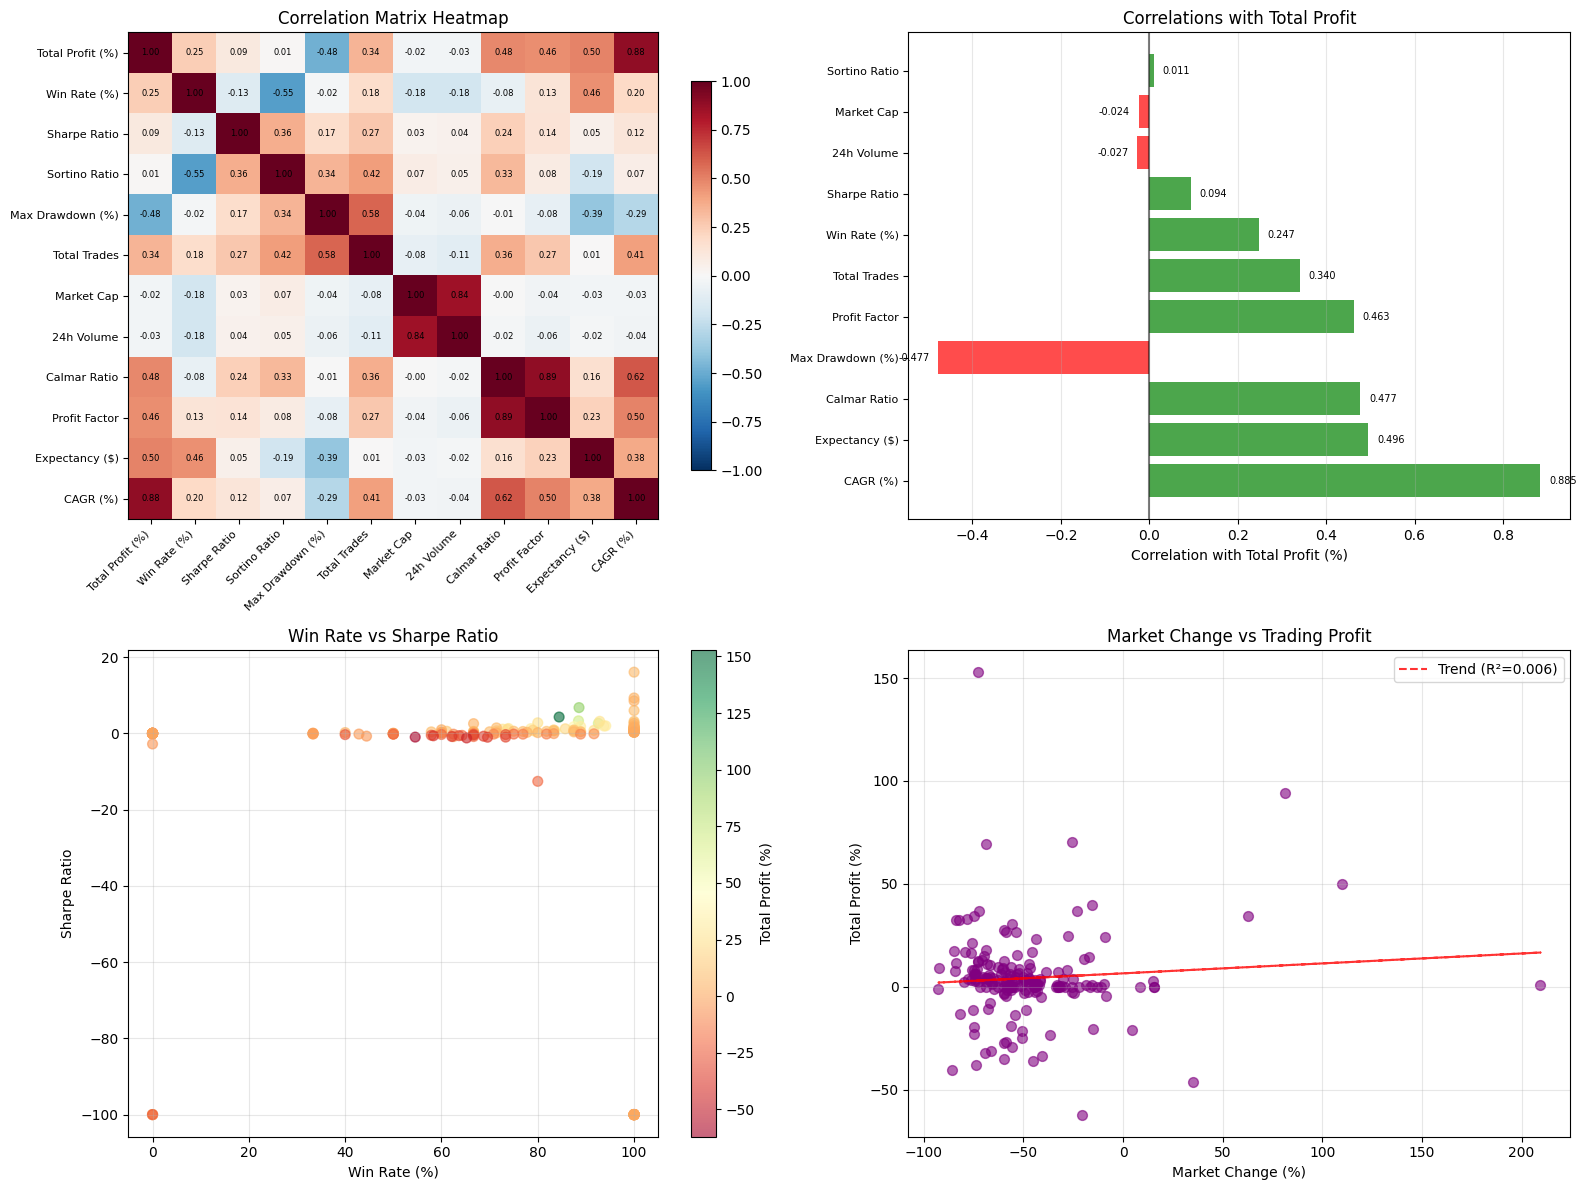

=== CORRELATION ANALYSIS ===

Strongest Correlations with Total Profit (%):
CAGR (%)            0.884514
Expectancy ($)      0.495641
Calmar Ratio        0.476833
Max Drawdown (%)   -0.476796
Profit Factor       0.462977
Total Trades        0.340237
Win Rate (%)        0.247139
Sharpe Ratio        0.094321
24h Volume         -0.027036
Market Cap         -0.023553
Name: Total Profit (%), dtype: float64

Key Insights:
- Win Rate correlation with Profit: 0.247
- Sharpe Ratio correlation with Profit: 0.094
- Max Drawdown correlation with Profit: -0.477
- Trading Volume correlation with Profit: 0.340
- Market Change correlation with Profit: 0.078

Highly Correlated Metric Pairs (|r| > 0.7):
  Total Profit (%) ↔ CAGR (%): 0.885
  Market Cap ↔ 24h Volume: 0.845
  Calmar Ratio ↔ Profit Factor: 0.887


In [27]:
# Correlation Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Select numeric columns for correlation analysis
numeric_columns = ['Total Profit (%)', 'Win Rate (%)', 'Sharpe Ratio', 'Sortino Ratio', 
                  'Max Drawdown (%)', 'Total Trades', 'Market Cap', '24h Volume', 
                  'Calmar Ratio', 'Profit Factor', 'Expectancy ($)', 'CAGR (%)']

# Create correlation matrix
corr_data = df[numeric_columns].corr()

# 1. Full correlation heatmap
im1 = axes[0, 0].imshow(corr_data, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
axes[0, 0].set_xticks(range(len(corr_data.columns)))
axes[0, 0].set_yticks(range(len(corr_data.columns)))
axes[0, 0].set_xticklabels(corr_data.columns, rotation=45, ha='right', fontsize=8)
axes[0, 0].set_yticklabels(corr_data.columns, fontsize=8)
axes[0, 0].set_title('Correlation Matrix Heatmap')

# Add correlation values to heatmap
for i in range(len(corr_data.columns)):
    for j in range(len(corr_data.columns)):
        text = axes[0, 0].text(j, i, f'{corr_data.iloc[i, j]:.2f}',
                              ha="center", va="center", color="black", fontsize=6)

plt.colorbar(im1, ax=axes[0, 0], shrink=0.8)

# 2. Focused correlation with Total Profit
profit_corr = corr_data['Total Profit (%)'].drop('Total Profit (%)').sort_values(key=abs, ascending=False)
colors = ['green' if x > 0 else 'red' for x in profit_corr.values]

bars_corr = axes[0, 1].barh(range(len(profit_corr)), profit_corr.values, color=colors, alpha=0.7)
axes[0, 1].set_yticks(range(len(profit_corr)))
axes[0, 1].set_yticklabels(profit_corr.index, fontsize=8)
axes[0, 1].set_xlabel('Correlation with Total Profit (%)')
axes[0, 1].set_title('Correlations with Total Profit')
axes[0, 1].axvline(0, color='black', linestyle='-', alpha=0.5)
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Add correlation values
for i, bar in enumerate(bars_corr):
    width = bar.get_width()
    axes[0, 1].text(width + (0.02 if width >= 0 else -0.02), bar.get_y() + bar.get_height()/2,
                    f'{width:.3f}', ha='left' if width >= 0 else 'right', va='center', fontsize=7)

# 3. Scatter plot matrix for key metrics
key_metrics = ['Total Profit (%)', 'Win Rate (%)', 'Sharpe Ratio', 'Max Drawdown (%)']
scatter_data = df[key_metrics].dropna()

# Create scatter plot for Win Rate vs Sharpe Ratio
scatter6 = axes[1, 0].scatter(scatter_data['Win Rate (%)'], scatter_data['Sharpe Ratio'], 
                             alpha=0.6, c=scatter_data['Total Profit (%)'], cmap='RdYlGn', s=50)
axes[1, 0].set_xlabel('Win Rate (%)')
axes[1, 0].set_ylabel('Sharpe Ratio')
axes[1, 0].set_title('Win Rate vs Sharpe Ratio')
plt.colorbar(scatter6, ax=axes[1, 0], label='Total Profit (%)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Market factors correlation
market_factors = df[['Total Profit (%)', 'Market Change (%)', 'Market Cap', '24h Volume']].dropna()

if len(market_factors) > 0:
    scatter7 = axes[1, 1].scatter(market_factors['Market Change (%)'], market_factors['Total Profit (%)'], 
                                 alpha=0.6, s=50, color='purple')
    axes[1, 1].set_xlabel('Market Change (%)')
    axes[1, 1].set_ylabel('Total Profit (%)')
    axes[1, 1].set_title('Market Change vs Trading Profit')
    axes[1, 1].grid(True, alpha=0.3)
    
    # Add trend line
    if len(market_factors) > 1:
        z = np.polyfit(market_factors['Market Change (%)'], market_factors['Total Profit (%)'], 1)
        p = np.poly1d(z)
        axes[1, 1].plot(market_factors['Market Change (%)'], p(market_factors['Market Change (%)']), 
                       "r--", alpha=0.8, label=f'Trend (R²={np.corrcoef(market_factors["Market Change (%)"], market_factors["Total Profit (%)"])[0,1]**2:.3f})')
        axes[1, 1].legend()
else:
    axes[1, 1].text(0.5, 0.5, 'Insufficient market data', ha='center', va='center', 
                   transform=axes[1, 1].transAxes, fontsize=12)
    axes[1, 1].set_title('Market Change vs Trading Profit')

plt.tight_layout()
plt.show()

# Statistical Analysis
print("=== CORRELATION ANALYSIS ===\n")

print("Strongest Correlations with Total Profit (%):")
print(profit_corr.head(10))

print(f"\nKey Insights:")
print(f"- Win Rate correlation with Profit: {corr_data.loc['Total Profit (%)', 'Win Rate (%)']:.3f}")
print(f"- Sharpe Ratio correlation with Profit: {corr_data.loc['Total Profit (%)', 'Sharpe Ratio']:.3f}")
print(f"- Max Drawdown correlation with Profit: {corr_data.loc['Total Profit (%)', 'Max Drawdown (%)']:.3f}")
print(f"- Trading Volume correlation with Profit: {corr_data.loc['Total Profit (%)', 'Total Trades']:.3f}")

# Market correlation analysis
if 'Market Change (%)' in df.columns and not df['Market Change (%)'].isna().all():
    market_profit_corr = df[['Market Change (%)', 'Total Profit (%)']].corr().iloc[0, 1]
    print(f"- Market Change correlation with Profit: {market_profit_corr:.3f}")

# Identify highly correlated pairs (potential multicollinearity)
print(f"\nHighly Correlated Metric Pairs (|r| > 0.7):")
high_corr_pairs = []
for i in range(len(corr_data.columns)):
    for j in range(i+1, len(corr_data.columns)):
        corr_val = corr_data.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr_pairs.append((corr_data.columns[i], corr_data.columns[j], corr_val))

for pair in high_corr_pairs:
    print(f"  {pair[0]} ↔ {pair[1]}: {pair[2]:.3f}")

if not high_corr_pairs:
    print("  No highly correlated pairs found.")


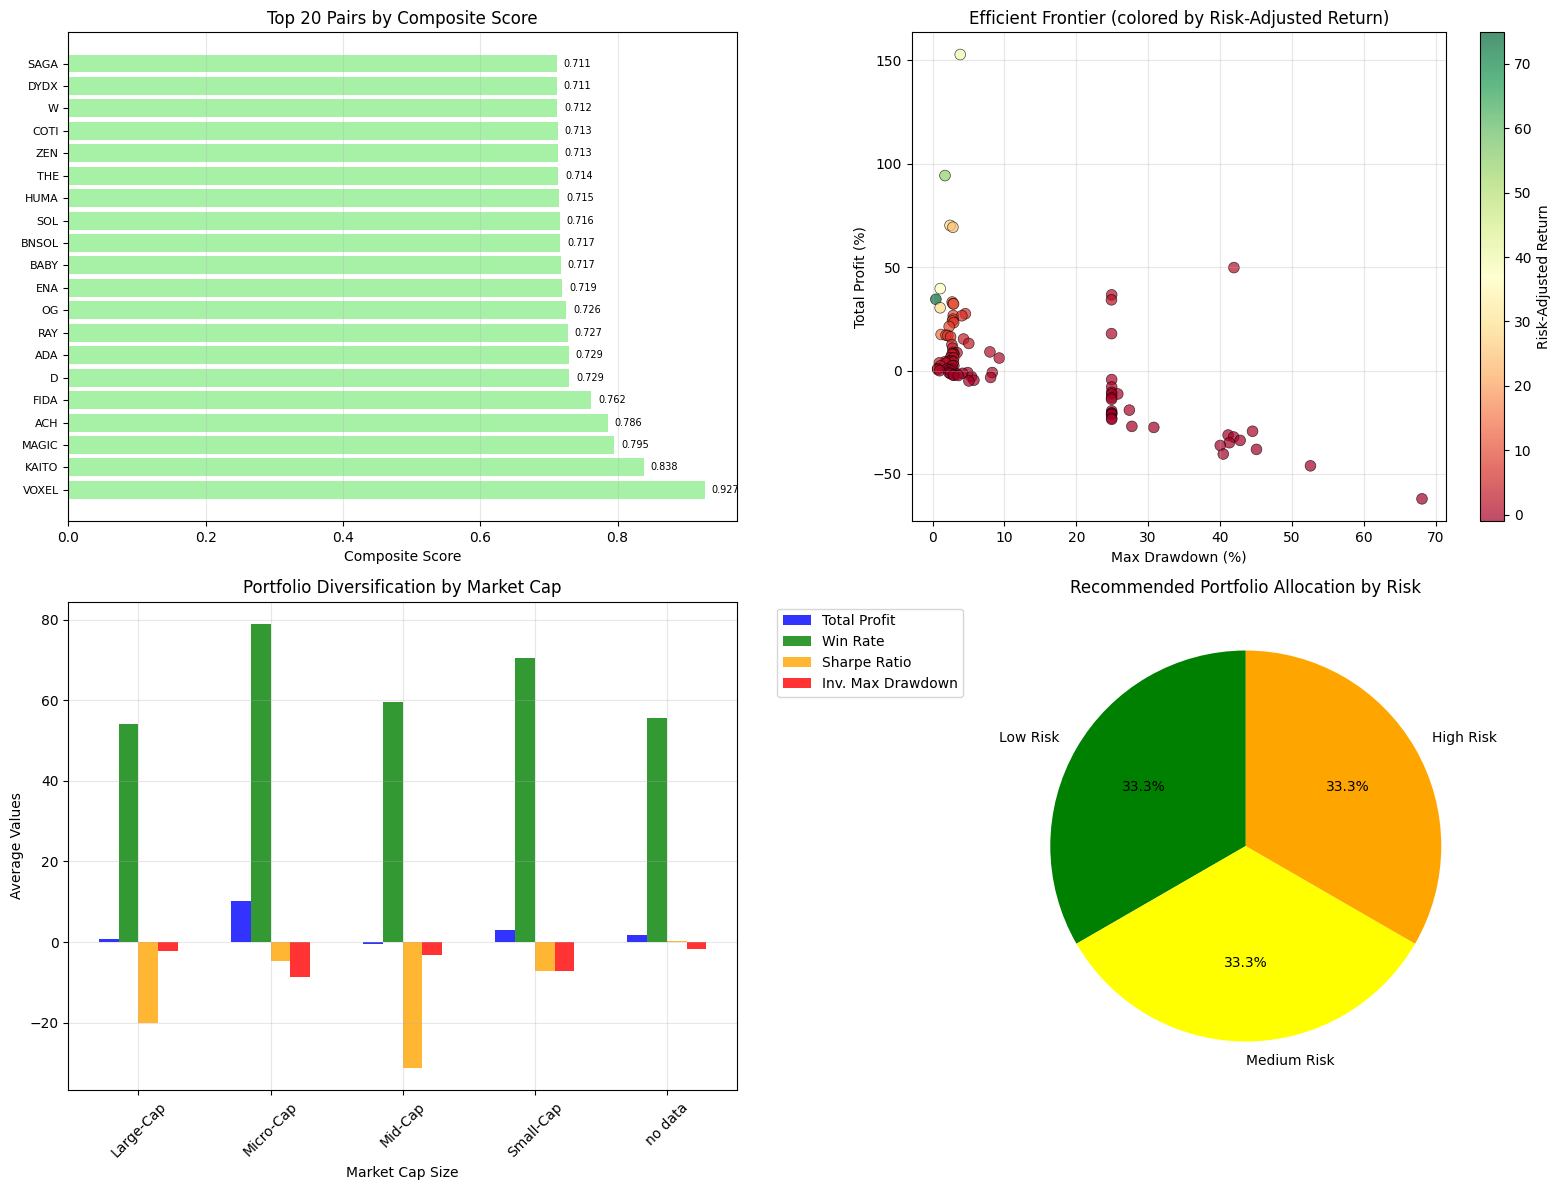

=== PORTFOLIO OPTIMIZATION ===

Top 10 Pairs by Composite Score:
Trading Pair  Total Profit (%)  Win Rate (%)  Sharpe Ratio  Max Drawdown (%)  Composite Score
  VOXEL/USDT            152.85         84.44         4.295              3.85         0.927388
  KAITO/USDT             94.31         88.57         6.769              1.73         0.838202
  MAGIC/USDT             69.31         92.59         2.645              2.83         0.795011
    ACH/USDT             70.19         88.46         3.294              2.43         0.785965
   FIDA/USDT             36.99        100.00         2.871              0.00         0.761634
      D/USDT             32.23         94.12         1.987              2.92         0.729324
    ADA/USDT              7.23        100.00        16.063              0.00         0.728978
    RAY/USDT             30.35         93.75         1.927              1.06         0.727342
     OG/USDT             39.61         87.50         1.766              1.07         0.72

In [28]:
# Portfolio Optimization Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Define scoring function for portfolio optimization
def calculate_composite_score(row):
    """Calculate a composite score based on multiple factors"""
    # Normalize metrics (0-1 scale)
    profit_score = (row['Total Profit (%)'] - df['Total Profit (%)'].min()) / (df['Total Profit (%)'].max() - df['Total Profit (%)'].min())
    
    # Win rate score (already 0-100, normalize to 0-1)
    winrate_score = row['Win Rate (%)'] / 100
    
    # Sharpe ratio score (handle negative values)
    sharpe_min = df['Sharpe Ratio'].min()
    sharpe_max = df['Sharpe Ratio'].max()
    if sharpe_max != sharpe_min:
        sharpe_score = (row['Sharpe Ratio'] - sharpe_min) / (sharpe_max - sharpe_min)
    else:
        sharpe_score = 0.5
    
    # Max drawdown score (inverse - lower is better)
    if df['Max Drawdown (%)'].max() != 0:
        drawdown_score = 1 - (row['Max Drawdown (%)'] / df['Max Drawdown (%)'].max())
    else:
        drawdown_score = 1
    
    # Weighted composite score
    composite = (0.4 * profit_score + 0.3 * winrate_score + 0.2 * sharpe_score + 0.1 * drawdown_score)
    return composite

# Calculate composite scores
df['Composite Score'] = df.apply(calculate_composite_score, axis=1)

# 1. Top Performers by Composite Score
top_composite = df.nlargest(20, 'Composite Score')
y_pos = np.arange(len(top_composite))
bars_comp = axes[0, 0].barh(y_pos, top_composite['Composite Score'], color='lightgreen', alpha=0.8)
axes[0, 0].set_yticks(y_pos)
axes[0, 0].set_yticklabels([pair.split('/')[0] for pair in top_composite['Trading Pair']], fontsize=8)
axes[0, 0].set_xlabel('Composite Score')
axes[0, 0].set_title('Top 20 Pairs by Composite Score')
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Add score labels
for i, bar in enumerate(bars_comp):
    width = bar.get_width()
    axes[0, 0].text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                    f'{width:.3f}', ha='left', va='center', fontsize=7)

# 2. Risk-Adjusted Returns (Efficient Frontier concept)
# Filter for pairs with sufficient data
efficient_pairs = df.dropna(subset=['Total Profit (%)', 'Max Drawdown (%)', 'Sharpe Ratio'])
efficient_pairs = efficient_pairs[efficient_pairs['Max Drawdown (%)'] > 0]  # Avoid division by zero

# Calculate risk-adjusted return
efficient_pairs['Risk_Adjusted_Return'] = efficient_pairs['Total Profit (%)'] / efficient_pairs['Max Drawdown (%)']

scatter8 = axes[0, 1].scatter(efficient_pairs['Max Drawdown (%)'], efficient_pairs['Total Profit (%)'], 
                             c=efficient_pairs['Risk_Adjusted_Return'], cmap='RdYlGn', 
                             s=60, alpha=0.7, edgecolors='black', linewidth=0.5)
axes[0, 1].set_xlabel('Max Drawdown (%)')
axes[0, 1].set_ylabel('Total Profit (%)')
axes[0, 1].set_title('Efficient Frontier (colored by Risk-Adjusted Return)')
plt.colorbar(scatter8, ax=axes[0, 1], label='Risk-Adjusted Return')
axes[0, 1].grid(True, alpha=0.3)

# 3. Diversification by Market Cap
portfolio_by_cap = df.groupby('Cap Size').agg({
    'Total Profit (%)': 'mean',
    'Win Rate (%)': 'mean',
    'Sharpe Ratio': 'mean',
    'Max Drawdown (%)': 'mean',
    'Composite Score': 'mean'
}).round(3)

# Create radar chart data
categories = ['Avg Profit', 'Avg Win Rate', 'Avg Sharpe', 'Low Drawdown', 'Composite Score']
cap_sizes = portfolio_by_cap.index.tolist()

# Normalize data for radar chart (0-1 scale)
radar_data = {}
for cap in cap_sizes:
    profit_norm = (portfolio_by_cap.loc[cap, 'Total Profit (%)'] - df['Total Profit (%)'].min()) / (df['Total Profit (%)'].max() - df['Total Profit (%)'].min())
    winrate_norm = portfolio_by_cap.loc[cap, 'Win Rate (%)'] / 100
    sharpe_norm = max(0, (portfolio_by_cap.loc[cap, 'Sharpe Ratio'] - df['Sharpe Ratio'].min()) / (df['Sharpe Ratio'].max() - df['Sharpe Ratio'].min()))
    drawdown_norm = 1 - (portfolio_by_cap.loc[cap, 'Max Drawdown (%)'] / df['Max Drawdown (%)'].max())
    composite_norm = portfolio_by_cap.loc[cap, 'Composite Score']
    
    radar_data[cap] = [profit_norm, winrate_norm, sharpe_norm, drawdown_norm, composite_norm]

# Bar chart for portfolio diversification
x_pos = np.arange(len(cap_sizes))
width = 0.15
colors_div = ['blue', 'green', 'orange', 'red', 'purple']

for i, metric in enumerate(['Total Profit (%)', 'Win Rate (%)', 'Sharpe Ratio', 'Max Drawdown (%)']):
    values = [portfolio_by_cap.loc[cap, metric] for cap in cap_sizes]
    if metric == 'Max Drawdown (%)':
        values = [-v for v in values]  # Invert for better visualization
        label = 'Inv. Max Drawdown'
    else:
        label = metric.replace(' (%)', '')
    
    axes[1, 0].bar(x_pos + i*width, values, width, label=label, alpha=0.8, color=colors_div[i])

axes[1, 0].set_xlabel('Market Cap Size')
axes[1, 0].set_ylabel('Average Values')
axes[1, 0].set_title('Portfolio Diversification by Market Cap')
axes[1, 0].set_xticks(x_pos + width * 1.5)
axes[1, 0].set_xticklabels(cap_sizes, rotation=45)
axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 0].grid(True, alpha=0.3)

# 4. Portfolio Allocation Recommendation
# Select top performers from each risk category
portfolio_recommendations = []
for risk_cat in ['Low Risk', 'Medium Risk', 'High Risk']:
    category_pairs = df[df['Risk Category'] == risk_cat]
    if len(category_pairs) > 0:
        top_in_category = category_pairs.nlargest(3, 'Composite Score')
        portfolio_recommendations.extend(top_in_category.index.tolist())

if portfolio_recommendations:
    recommended_pairs = df.loc[portfolio_recommendations]
    
    # Pie chart for recommended allocation
    risk_allocation = recommended_pairs['Risk Category'].value_counts()
    colors_alloc = ['green', 'yellow', 'orange', 'red']
    pie_alloc = axes[1, 1].pie(risk_allocation.values, labels=risk_allocation.index, 
                              autopct='%1.1f%%', startangle=90, colors=colors_alloc[:len(risk_allocation)])
    axes[1, 1].set_title('Recommended Portfolio Allocation by Risk')
else:
    axes[1, 1].text(0.5, 0.5, 'Insufficient data for recommendations', 
                   ha='center', va='center', transform=axes[1, 1].transAxes)

plt.tight_layout()
plt.show()

# Portfolio Optimization Results
print("=== PORTFOLIO OPTIMIZATION ===\n")

print("Top 10 Pairs by Composite Score:")
top_10_composite = df.nlargest(10, 'Composite Score')
print(top_10_composite[['Trading Pair', 'Total Profit (%)', 'Win Rate (%)', 
                       'Sharpe Ratio', 'Max Drawdown (%)', 'Composite Score']].to_string(index=False))

print(f"\nPortfolio Diversification by Market Cap:")
print(portfolio_by_cap)

print(f"\nRisk-Adjusted Return Leaders:")
if len(efficient_pairs) > 0:
    top_risk_adjusted = efficient_pairs.nlargest(10, 'Risk_Adjusted_Return')
    print(top_risk_adjusted[['Trading Pair', 'Total Profit (%)', 'Max Drawdown (%)', 'Risk_Adjusted_Return']].to_string(index=False))

# Portfolio recommendations
print(f"\n=== PORTFOLIO RECOMMENDATIONS ===")
print(f"Based on composite scoring and risk diversification:")

if portfolio_recommendations:
    for risk_cat in ['Low Risk', 'Medium Risk', 'High Risk']:
        category_recs = recommended_pairs[recommended_pairs['Risk Category'] == risk_cat]
        if len(category_recs) > 0:
            print(f"\n{risk_cat} Allocation ({len(category_recs)} pairs):")
            for idx, row in category_recs.iterrows():
                print(f"  • {row['Trading Pair']}: {row['Total Profit (%)']:.1f}% profit, {row['Win Rate (%)']:.1f}% win rate")

# Summary statistics for recommended portfolio
if portfolio_recommendations:
    portfolio_stats = recommended_pairs.agg({
        'Total Profit (%)': 'mean',
        'Win Rate (%)': 'mean',
        'Sharpe Ratio': 'mean',
        'Max Drawdown (%)': 'mean'
    })
    
    print(f"\nRecommended Portfolio Statistics:")
    print(f"  Average Profit: {portfolio_stats['Total Profit (%)']:.2f}%")
    print(f"  Average Win Rate: {portfolio_stats['Win Rate (%)']:.1f}%")
    print(f"  Average Sharpe Ratio: {portfolio_stats['Sharpe Ratio']:.3f}")
    print(f"  Average Max Drawdown: {portfolio_stats['Max Drawdown (%)']:.2f}%")


In [35]:
# Key Insights and Recommendations Summary

print("=" * 80)
print("COMPREHENSIVE TRADING ANALYSIS - KEY INSIGHTS & RECOMMENDATIONS")
print("=" * 80)

# 1. Overall Performance Summary
print("\n📊 OVERALL PERFORMANCE SUMMARY")
print("-" * 50)
total_pairs = len(df)
profitable_pairs = len(df[df['Total Profit (%)'] > 0])
unprofitable_pairs = len(df[df['Total Profit (%)'] < 0])
breakeven_pairs = len(df[df['Total Profit (%)'] == 0])

print(f"Total Trading Pairs Analyzed: {total_pairs}")
print(f"Profitable Pairs: {profitable_pairs} ({profitable_pairs/total_pairs*100:.1f}%)")
print(f"Unprofitable Pairs: {unprofitable_pairs} ({unprofitable_pairs/total_pairs*100:.1f}%)")
print(f"Break-even Pairs: {breakeven_pairs} ({breakeven_pairs/total_pairs*100:.1f}%)")
print(f"Average Return: {df['Total Profit (%)'].mean():.2f}%")
print(f"Best Performer: {df.loc[df['Total Profit (%)'].idxmax(), 'Trading Pair']} ({df['Total Profit (%)'].max():.2f}%)")
print(f"Worst Performer: {df.loc[df['Total Profit (%)'].idxmin(), 'Trading Pair']} ({df['Total Profit (%)'].min():.2f}%)")

# 2. Risk Analysis Summary
print("\n⚠️  RISK ANALYSIS SUMMARY")
print("-" * 50)
risk_distribution = df['Risk Category'].value_counts()
for risk_cat, count in risk_distribution.items():
    avg_profit = df[df['Risk Category'] == risk_cat]['Total Profit (%)'].mean()
    print(f"{risk_cat}: {count} pairs (avg return: {avg_profit:.2f}%)")

avg_sharpe = df['Sharpe Ratio'].mean()
avg_drawdown = df['Max Drawdown (%)'].mean()
print(f"Average Sharpe Ratio: {avg_sharpe:.3f}")
print(f"Average Max Drawdown: {avg_drawdown:.2f}%")

# 3. Market Cap Analysis
print("\n🏢 MARKET CAP ANALYSIS")
print("-" * 50)
cap_performance = df.groupby('Cap Size').agg({
    'Total Profit (%)': 'mean',
    'Win Rate (%)': 'mean'
}).round(2)

for cap_size, row in cap_performance.iterrows():
    count = len(df[df['Cap Size'] == cap_size])
    print(f"{cap_size}: {count} pairs, avg return: {row['Total Profit (%)']}%, avg win rate: {row['Win Rate (%)']}%")

# 4. Trading Patterns
print("\n📈 TRADING PATTERNS")
print("-" * 50)
avg_trades = df['Total Trades'].mean()
avg_winrate = df['Win Rate (%)'].mean()
high_freq_pairs = len(df[df['Total Trades'] > 20])
perfect_winrate = len(df[df['Win Rate (%)'] == 100])

print(f"Average Trades per Pair: {avg_trades:.1f}")
print(f"Average Win Rate: {avg_winrate:.1f}%")
print(f"High-Frequency Pairs (>20 trades): {high_freq_pairs}")
print(f"Perfect Win Rate Pairs (100%): {perfect_winrate}")

# 5. Top Recommendations
print("\n🎯 TOP RECOMMENDATIONS")
print("-" * 50)

# Best overall performers
print("💎 BEST OVERALL PERFORMERS:")
top_20_profit = df.nlargest(20, 'Total Profit (%)')
for idx, row in top_20_profit.iterrows():
    print(f"  • {row['Trading Pair']}: {row['Total Profit (%)']:.1f}% return, "
          f"{row['Win Rate (%)']:.1f}% win rate, {row['Sharpe Ratio']:.2f} Sharpe")
    
# Print all top pairs in json list with pair name only
print(top_20_profit['Trading Pair'].to_json(orient='records'))

# Best risk-adjusted performers
print("\n⚖️  BEST RISK-ADJUSTED PERFORMERS:")
top_5_composite = df.nlargest(5, 'Composite Score')
for idx, row in top_5_composite.iterrows():
    print(f"  • {row['Trading Pair']}: {row['Total Profit (%)']:.1f}% return, "
          f"{row['Max Drawdown (%)']:.1f}% drawdown, {row['Composite Score']:.3f} score")

# Low-risk high-performers
low_risk_high_profit = df[
    (df['Risk Category'] == 'Low Risk') & 
    (df['Total Profit (%)'] > 10)
].sort_values('Total Profit (%)', ascending=False)

print("\n🛡️  LOW-RISK HIGH-PERFORMERS:")
if len(low_risk_high_profit) > 0:
    for idx, row in low_risk_high_profit.head(5).iterrows():
        print(f"  • {row['Trading Pair']}: {row['Total Profit (%)']:.1f}% return, "
              f"{row['Max Drawdown (%)']:.1f}% max drawdown")
else:
    print("  No low-risk high-performers found with >10% returns")


COMPREHENSIVE TRADING ANALYSIS - KEY INSIGHTS & RECOMMENDATIONS

📊 OVERALL PERFORMANCE SUMMARY
--------------------------------------------------
Total Trading Pairs Analyzed: 184
Profitable Pairs: 116 (63.0%)
Unprofitable Pairs: 45 (24.5%)
Break-even Pairs: 23 (12.5%)
Average Return: 4.19%
Best Performer: VOXEL/USDT (152.85%)
Worst Performer: LAYER/USDT (-62.07%)

⚠️  RISK ANALYSIS SUMMARY
--------------------------------------------------
Very High Risk: 88 pairs (avg return: -7.20%)
Low Risk: 39 pairs (avg return: 23.80%)
High Risk: 29 pairs (avg return: 6.56%)
Medium Risk: 28 pairs (avg return: 10.20%)
Average Sharpe Ratio: -11.902
Average Max Drawdown: 6.41%

🏢 MARKET CAP ANALYSIS
--------------------------------------------------
Large-Cap: 14 pairs, avg return: 0.71%, avg win rate: 54.17%
Micro-Cap: 54 pairs, avg return: 10.17%, avg win rate: 78.97%
Mid-Cap: 35 pairs, avg return: -0.52%, avg win rate: 59.66%
Small-Cap: 78 pairs, avg return: 2.87%, avg win rate: 70.38%
no data: 3